In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import os 
import sys 
import re
from tqdm import tqdm
from joblib import Parallel, delayed

/home/daiwei/miniconda3/envs/rlhf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
grid_search_fileNames = os.listdir('./save/')
grid_search_filePaths = [os.path.join('./save/',i) for i in grid_search_fileNames]

In [3]:
train_stats_all = []

def tmp_fun(filePath):
    res = torch.load(filePath)
    return({**res['args'], 'test_accu_record': res['train_stats']['test_accu_record']})

train_stats_all = Parallel(n_jobs=32)(delayed(tmp_fun)(i) for i in tqdm(grid_search_filePaths))

torch.save(train_stats_all, 'train_stats_all.pt')

100%|██████████| 10/10 [00:00<00:00, 827.74it/s]


In [3]:
train_stats_all = torch.load('train_stats_all.pt')

In [5]:
test_accu_final_list = []
for i in train_stats_all:
    test_accu_final_list.append(i['test_accu_record'][-1])

In [7]:
np.array(test_accu_final_list).argmax()

126

In [12]:
test_accu_final_list[126]

0.6259084302325582

In [13]:
train_stats_all[126]

{'epochs': 2000,
 'bs': 64,
 'lr': 0.005,
 'feature_dim': 3,
 'num_users': 48,
 'num_pairs_per_user': 300,
 'weight_decay_us': 0,
 'weight_decay_net': 0.001,
 'optimizer_name': 'adam',
 'test_accu_record': [0.5271519702842378,
  0.5491965439276486,
  0.5662952196382429,
  0.5800226098191215,
  0.5856952519379846,
  0.5901768410852714,
  0.5939518733850129,
  0.5952438630490956,
  0.5956677971576227,
  0.5973029715762274,
  0.5974442829457365,
  0.5995841408268734,
  0.5990996447028424,
  0.5999071382428941,
  0.5996043281653747,
  0.6004320090439277,
  0.6002705103359173,
  0.6014615633074936,
  0.6010174418604651,
  0.6019864341085271,
  0.6009568798449613,
  0.6022286821705426,
  0.600734819121447,
  0.6017845607235142,
  0.6012395025839793,
  0.6012395025839793,
  0.6028343023255814,
  0.6017845607235142,
  0.6031774870801033,
  0.6015423126614987,
  0.603500484496124,
  0.6022892441860465,
  0.6032380490956072,
  0.603015988372093,
  0.602672803617571,
  0.6023699935400517,
  0.602

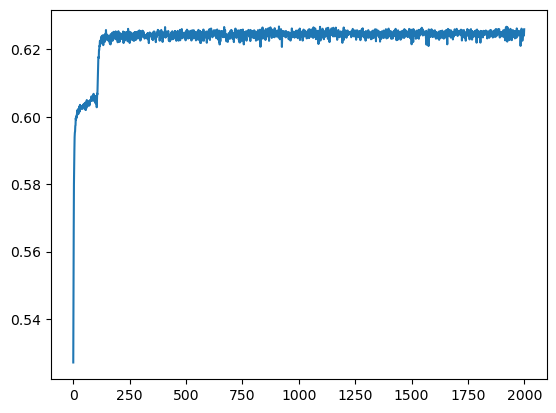

In [14]:
plt.plot(train_stats_all[126]['test_accu_record'])

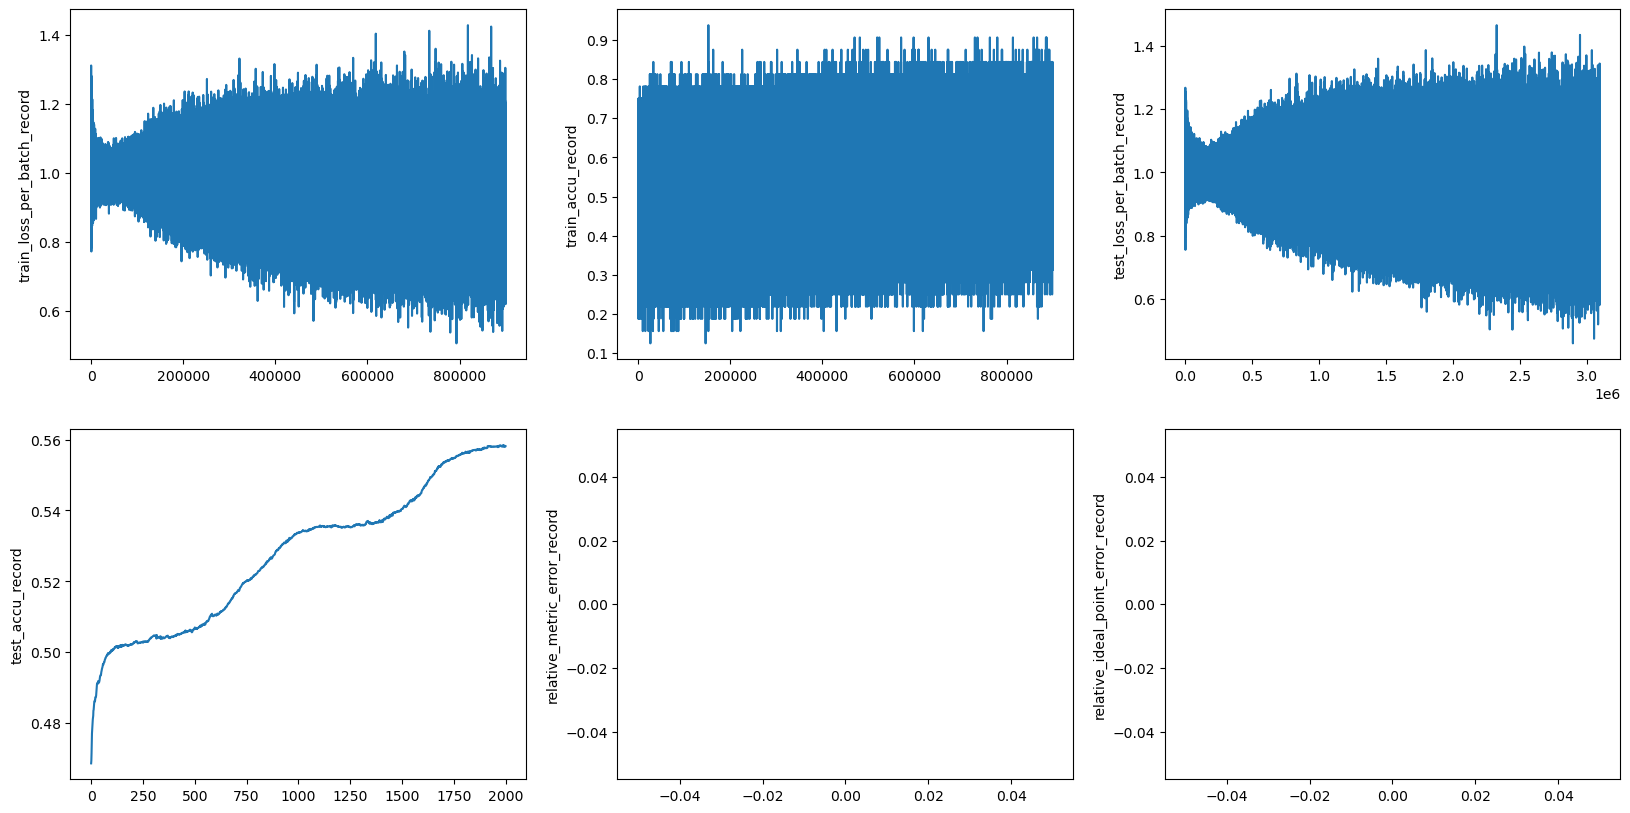

In [11]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
ax_flatten = ax.flatten()
for idx,key in enumerate(res['train_stats']):
    ax_flatten[idx].plot(res['train_stats'][key])
    ax_flatten[idx].set_ylabel(key)